# **ENTRENAMIENTO MODELO - Proyecto Final**
## HardVision

**Autor:** Iv√°n Falc√≥n Monz√≥n

In [1]:
# ------------------------------
# 1. Montar Google Drive
# ------------------------------
from google.colab import drive
drive.mount('/content/drive')
# El dataset de entrenamiento esta en Google Drive compartido porque es muy grande para Github: https://drive.google.com/drive/folders/1eT3MkyZ9aWkNkTwvNsLaj6ncebsHt1g8?usp=sharing

Mounted at /content/drive


## Importar librer√≠as necesar√≠as

In [2]:
# ------------------------------
# 2. Instalaci√≥n de librer√≠as necesarias
# ------------------------------

# Este bloque de c√≥digo se encarga de instalar las librer√≠as de Python requeridas para el proyecto.

# Instalar la librer√≠a 'ultralytics'.
# 'ultralytics' es la librer√≠a oficial que proporciona la implementaci√≥n de los modelos YOLO (You Only Look Once),
# incluyendo YOLOv8, que es el modelo que vamos a entrenar m√°s abajo.
# Contiene funciones para entrenamiento, validaci√≥n, inferencia y exportaci√≥n de modelos YOLO.
!pip install ultralytics

# Instalar la librer√≠a 'openimages'.
# 'openimages' es una herramienta que facilita el acceso y la descarga de subconjuntos del dataset Open Images.
# Este dataset es una colecci√≥n muy grande de im√°genes con anotaciones de objetos.
!pip install openimages

# Instalar la librer√≠a 'fiftyone'.
# 'fiftyone' es una librer√≠a de c√≥digo abierto para construir, evaluar y visualizar datasets
# de visi√≥n por computadora. Es extremadamente √∫til para:
# - Cargar y explorar datasets de im√°genes y anotaciones.
# - Visualizar datos de entrenamiento, validaci√≥n y predicciones.
# - Encontrar y corregir errores en las anotaciones.
# - Filtrar y manipular subconjuntos de datos.
# Es una herramienta √∫til para la gesti√≥n y depuraci√≥n del dataset durante el ciclo de vida del entrenamiento de un modelo.
!pip install fiftyone

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 129.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 64.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

## Importar imagenes para Unknown

In [3]:
# ------------------------------
#  3. Importar imagenes de Open images v6
# ------------------------------
import os # Importa el m√≥dulo 'os' para interactuar con el sistema operativo, como crear directorios y manejar rutas de archivos.
import fiftyone.zoo as foz # Importa el m√≥dulo 'zoo' de fiftyone con el alias 'foz'. 'fiftyone.zoo' permite cargar y gestionar datasets preexistentes, como Open Images.
from PIL import Image # Importa la clase 'Image' del m√≥dulo 'PIL' (Pillow), que se utiliza para abrir, manipular y guardar im√°genes.

# Ruta base donde se guardar√°n las im√°genes descargadas para la clase "unknown".
# Estas im√°genes se organizar√°n dentro del dataset de entrenamiento.
output_dir = "/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/train/images/unknown"

# Define una lista de nombres de clases que se descargar√°n.
# Estas clases se agrupar√°n bajo la categor√≠a "unknown" para el entrenamiento del modelo.
# Esto es √∫til en escenarios donde ciertas clases no son el objetivo principal de detecci√≥n
# pero se quiere que el modelo las reconozca como "no relevantes" o "desconocidas".
classes = ["pizza", "cake", "tv", "frisbee", "dog", "microwave", "suitcase", "backpack", "vase", "mouse"]

# Crea el directorio base especificado en 'output_dir' si no existe.
# 'exist_ok=True' evita que se lance un error si el directorio ya existe.
os.makedirs(output_dir, exist_ok=True)

# Define el tama√±o al que se redimensionar√°n todas las im√°genes descargadas.
# Homogeneizar el tama√±o de las im√°genes es una pr√°ctica com√∫n en el entrenamiento de modelos de visi√≥n
# para asegurar una entrada consistente al modelo. YOLOv8 suele trabajar con 640x640.
img_size = (640, 640)

# Itera sobre cada clase definida en la lista 'classes'.
for cls in classes:
    # Construye la ruta del directorio espec√≠fico para la clase actual dentro de 'output_dir'.
    class_dir = os.path.join(output_dir, cls)
    # Crea el directorio de la clase si no existe.
    os.makedirs(class_dir, exist_ok=True)

    # Verifica si ya existen im√°genes en la carpeta de la clase actual.
    # Esto es √∫til para reanudar descargas o evitar descargas duplicadas.
    # Filtra solo archivos que terminan en extensiones de imagen comunes.
    existing_images = [f for f in os.listdir(class_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    # Si ya hay 100 o m√°s im√°genes en la carpeta, se asume que la descarga para esta clase est√° completa
    # y se salta a la siguiente clase.
    if len(existing_images) >= 100:
        print(f"Clase '{cls}' ya tiene im√°genes. Saltando descarga.")
        continue # Pasa a la siguiente iteraci√≥n del bucle.

    print(f"Descargando clase: {cls}")

    # Descarga im√°genes desde el dataset Open Images V6 usando FiftyOne.
    dataset = foz.load_zoo_dataset(
        "open-images-v6", # Especifica el dataset a cargar.
        split="train", # Descarga im√°genes del split de entrenamiento.
        label_types=["classifications"], # Solicita solo etiquetas de clasificaci√≥n (no bounding boxes).
        classes=[cls], # Filtra para descargar solo im√°genes que contengan la clase actual.
        max_samples=100, # Limita la descarga a un m√°ximo de 100 im√°genes por clase.
        shuffle=True # Mezcla las im√°genes antes de seleccionarlas.
    )

    # Itera sobre cada muestra (imagen) descargada del dataset.
    for sample in dataset:
        img = sample.filepath # Obtiene la ruta del archivo de la imagen descargada.
        img_name = os.path.basename(img) # Extrae el nombre del archivo de la ruta.
        dest_path = os.path.join(class_dir, img_name) # Construye la ruta de destino para guardar la imagen.

        # Verifica si la imagen ya existe en la ruta de destino para evitar sobrescribir.
        if os.path.exists(dest_path):
            continue # Si ya existe, salta a la siguiente imagen.

        try:
            # Abre la imagen usando Pillow.
            with Image.open(img) as im:
                im = im.convert("RGB") # Convierte la imagen a formato RGB para asegurar consistencia (algunas pueden ser RGBA...).
                im = im.resize(img_size) # Redimensiona la imagen al tama√±o predefinido (640x640).
                im.save(dest_path, "JPEG") # Guarda la imagen redimensionada en la ruta de destino con formato JPEG.
        except Exception as e:
            # Captura y muestra cualquier error que ocurra durante el procesamiento de una imagen.
            print(f"Error con la imagen {img}: {e}")

    print(f" {cls} terminado.") # Imprime un mensaje cuando la descarga y procesamiento de una clase ha finalizado.

print("¬°Todo listo! Im√°genes descargadas y organizadas.") # Mensaje final indicando que todo el proceso ha terminado.

Clase 'pizza' ya tiene im√°genes. Saltando descarga.
Clase 'cake' ya tiene im√°genes. Saltando descarga.
Clase 'tv' ya tiene im√°genes. Saltando descarga.
Clase 'frisbee' ya tiene im√°genes. Saltando descarga.
Clase 'dog' ya tiene im√°genes. Saltando descarga.
Clase 'microwave' ya tiene im√°genes. Saltando descarga.
Clase 'suitcase' ya tiene im√°genes. Saltando descarga.
Clase 'backpack' ya tiene im√°genes. Saltando descarga.
Clase 'vase' ya tiene im√°genes. Saltando descarga.
Clase 'mouse' ya tiene im√°genes. Saltando descarga.
¬°Todo listo! Im√°genes descargadas y organizadas.


In [4]:
# ------------------------------
# 4. Generaci√≥n autom√°tica de etiquetas para YOLO (formato txt)
# ------------------------------

# Este bloque de c√≥digo se encarga de generar archivos de etiquetas en formato YOLO (.txt)
# para las im√°genes que fueron descargadas y clasificadas como "unknown".
# Para simplificar, cada imagen se marca como "unknown" (clase 10) con una caja delimitadora
# que ocupa una porci√≥n central de la imagen.

import os # Importa el m√≥dulo 'os' para interactuar con el sistema de archivos (crear directorios, listar archivos, etc.).
import fiftyone.zoo as foz # Importa fiftyone.zoo, aunque no se usa directamente en este bloque, se mantuvo del c√≥digo anterior.
from PIL import Image # Importa la clase 'Image' de Pillow para manejar im√°genes, aunque en este caso solo se usa para obtener dimensiones.

# Define la ruta ra√≠z donde se guardar√°n los archivos de etiquetas (.txt).
labels_root = "/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/train/labels/unknown"

# Define el ID de clase para las im√°genes "unknown".
# Es crucial que este ID (10 en este caso) coincida con el ID asignado a la clase 'unknown'
# en el archivo de configuraci√≥n `data.yaml` de YOLOv8.
unknown_class_id = 10  # Debe coincidir con data.yaml

# Crea el directorio donde se guardar√°n los archivos de etiquetas si no existe.
# 'exist_ok=True' previene errores si el directorio ya ha sido creado.
os.makedirs(labels_root, exist_ok=True)

# Itera sobre cada subcarpeta dentro de 'output_dir'.
# 'output_dir' fue definido en el bloque de c√≥digo anterior y contiene las im√°genes descargadas
# organizadas por sus clases originales (pizza, cake, etc.), que ahora consideramos "unknown".
for class_folder in os.listdir(output_dir):
    # Construye la ruta completa a la carpeta de la clase actual.
    class_folder_path = os.path.join(output_dir, class_folder)

    # Verifica si la entrada actual es realmente un directorio. Si no lo es (por ejemplo, es un archivo),
    # se salta a la siguiente iteraci√≥n del bucle.
    if not os.path.isdir(class_folder_path):
        continue

    # Itera sobre cada archivo dentro de la carpeta de la clase actual.
    for filename in os.listdir(class_folder_path):
        # Asegura que solo se procesen archivos de imagen (en este caso, JPEG).
        if not filename.lower().endswith(".jpg"):
            continue

        # Construye la ruta completa a la imagen actual.
        image_path = os.path.join(class_folder_path, filename)

        # Genera el nombre del archivo de etiqueta correspondiente.
        # Por ejemplo, para 'imagen.jpg', el archivo de etiqueta ser√° 'imagen.txt'.
        label_filename = os.path.splitext(filename)[0] + ".txt"
        label_path = os.path.join(labels_root, label_filename)

        # Verificaci√≥n de existencia del archivo de etiqueta
        # Si el archivo de etiqueta (.txt) para esta imagen ya existe, se salta su creaci√≥n.
        # Esto evita reescribir etiquetas innecesariamente y permite reanudar el proceso.
        if os.path.exists(label_path):
            # print(f"Etiqueta para {filename} ya existe. Saltando.") # Descomentar para ver mensajes
            continue

        # Abrir imagen para obtener dimensiones. Aunque en este caso la caja es fija,
        # en escenarios m√°s complejos las dimensiones son necesarias para normalizar las coordenadas YOLO.
        try:
            with Image.open(image_path) as im:
                width, height = im.size # Obtiene el ancho y alto de la imagen.
        except Exception as e:
            # Si hay un error al abrir la imagen, se imprime un mensaje y se salta a la siguiente.
            print(f"Error con imagen: {image_path} - {e}")
            continue

        # Define las coordenadas y dimensiones de la caja delimitadora en formato YOLO normalizado.
        # YOLO usa (x_center, y_center, width, height) donde todos los valores est√°n normalizados
        # entre 0 y 1, relativos al ancho y alto de la imagen.
        x_center = 0.5 # Centro horizontal de la caja (50% del ancho de la imagen).
        y_center = 0.5 # Centro vertical de la caja (50% del alto de la imagen).
        w = 0.6 # Ancho de la caja (60% del ancho de la imagen).
        h = 0.6 # Alto de la caja (60% del alto de la imagen).

        # Abre el archivo de etiqueta en modo escritura ('w').
        # Si el archivo no existe, lo crea; si existe, lo sobrescribe (aunque la verificaci√≥n anterior lo evita).
        with open(label_path, "w") as f:
            # Escribe la l√≠nea de la etiqueta en el archivo. El formato es:
            # <class_id> <x_center> <y_center> <width> <height>
            f.write(f"{unknown_class_id} {x_center} {y_center} {w} {h}\n")

print("Etiquetas generadas autom√°ticamente para clase 'unknown'.")

Etiquetas generadas autom√°ticamente para clase 'unknown'.


In [5]:
import os # Importa el m√≥dulo 'os' para interactuar con el sistema de archivos, como listar directorios.

# Define la ruta al directorio donde se encuentran las etiquetas generadas para la clase "unknown".
labels_dir = "/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/train/labels/unknown"

# Lista todos los archivos en el directorio 'labels_dir' y filtra aquellos que terminan con ".txt".
# Esto crea una lista de todos los archivos de etiquetas YOLO generados.
labels = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]

# Imprime el n√∫mero total de archivos de etiquetas encontrados en el directorio.
print(f"Total etiquetas en unknown: {len(labels)}")

# Imprime los primeros 5 nombres de archivos de etiquetas como ejemplo,
# lo que permite una verificaci√≥n r√°pida de que se han generado los archivos.
print("Ejemplos:", labels[:5])

Total etiquetas en unknown: 100
Ejemplos: ['c4281407137dacc0.txt', 'e8360570bde54a58.txt', '4dfb763cad6e41fd.txt', 'db2a95d178776844.txt', '8c5373a8ee722f31.txt']


## Entrenamiento del modelo

Este entrenamiento con el modelo de YOLOv8 en Google Colab con el entrono de ejecuci√≥n de GPU-T4 suele tardar entre 45-50 minutos

In [6]:
# ------------------------------
# 5. Entrenamiento del modelo YOLOv8
# ------------------------------

# Importa la clase YOLO de la librer√≠a ultralytics.
# Esta clase es la interfaz principal para cargar, entrenar, validar y usar modelos YOLOv8.
from ultralytics import YOLO

# Carga un modelo YOLOv8 pre-entrenado.
# "yolov8n.pt" se refiere a la versi√≥n "nano" de YOLOv8, que es la m√°s peque√±a y r√°pida,
# ideal para entornos con recursos limitados o para pruebas iniciales.
# Los modelos pre-entrenados han sido previamente entrenados en grandes datasets (como COCO)
# y ya han aprendido a detectar una amplia variedad de objetos. Esto permite un "fine-tuning"
# m√°s r√°pido y eficiente para el dataset.
model = YOLO("yolov8n.pt")

# Inicia el proceso de entrenamiento del modelo.
# Se pasan varios argumentos clave para configurar el entrenamiento:
model.train(
    # 'data': Ruta al archivo de configuraci√≥n YAML de tu dataset.
    # Este archivo 'data.yaml' es crucial porque define:
    # - Las rutas a las carpetas de im√°genes de entrenamiento y validaci√≥n.
    # - Las rutas a las carpetas de etiquetas de entrenamiento y validaci√≥n.
    # - Los nombres de las clases que el modelo aprender√° a detectar.
    data="/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/data.yaml",

    # 'epochs': N√∫mero de √©pocas (iteraciones completas sobre todo el dataset de entrenamiento).
    # M√°s √©pocas pueden llevar a un mejor rendimiento, pero tambi√©n aumentan el tiempo de entrenamiento
    # y el riesgo de overfitting (que el modelo memorice los datos de entrenamiento en lugar de aprender patrones generales).
    epochs=50,

    # 'imgsz': Tama√±o de la imagen de entrada para el modelo durante el entrenamiento.
    # Las im√°genes se redimensionar√°n a este tama√±o antes de ser alimentadas a la red.
    # Un tama√±o de 640x640 es un est√°ndar com√∫n para YOLOv8.
    imgsz=640,

    # 'batch': Tama√±o del lote (batch size).
    # N√∫mero de im√°genes procesadas simult√°neamente por el modelo antes de actualizar sus pesos.
    # Un batch size m√°s grande puede acelerar el entrenamiento si tienes suficiente VRAM en la GPU,
    # pero un batch size m√°s peque√±o puede ayudar a la generalizaci√≥n en algunos casos.
    batch=16,

    # 'workers': N√∫mero de procesos (workers) a usar para la carga de datos.
    # Un mayor n√∫mero de workers puede acelerar la preparaci√≥n de los datos de entrada,
    # especialmente si el cuello de botella est√° en la lectura y preprocesamiento de im√°genes.
    workers=2,

    # 'name': Nombre para el directorio donde se guardar√°n los resultados del entrenamiento (pesos, m√©tricas, gr√°ficos).
    # Esto ayuda a organizar tus experimentos si entrenas m√∫ltiples modelos o variaciones.
    name="resultados"
)

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.25M/6.25M [00:00<00:00, 272MB/s]


Ultralytics 8.3.144 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=resultados, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 92.5MB/s]

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,012,993 parameters, 3,012,977 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 396MB/s]


AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.4¬±0.1 ms, read: 0.1¬±0.0 MB/s, size: 65.1 KB)


train: Scanning /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/train/labels... 1733 images, 1100 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2833/2833 [36:41<00:00,  1.29it/s]


train: New cache created: /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/train/labels.cache
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 14529, len(boxes) = 14751. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.7¬±0.2 ms, read: 0.1¬±0.0 MB/s, size: 70.0 KB)


val: Scanning /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/valid/labels.cache... 83 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83/83 [00:00<?, ?it/s]


Plotting labels to runs/detect/resultados/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/resultados
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.09G      1.827      3.162      1.708          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:13<00:00,  4.59s/it]

                   all         83        869      0.809      0.407      0.458      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G      1.498      1.845      1.462          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.37it/s]

                   all         83        869      0.714      0.671      0.753      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.59G      1.407       1.61      1.404          6        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.47it/s]

                   all         83        869      0.712      0.724      0.756      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G      1.341      1.456      1.363         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.39it/s]

                   all         83        869      0.778      0.806      0.798      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.59G      1.274      1.331       1.32         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        869       0.82       0.83      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.59G      1.226      1.242      1.288          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.59it/s]

                   all         83        869      0.726       0.85      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G      1.177       1.19      1.248          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.55it/s]

                   all         83        869      0.844      0.858      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.6G      1.152      1.112      1.238         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.85it/s]

                   all         83        869      0.861      0.855      0.889      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.62G      1.119      1.074      1.224         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.31it/s]


                   all         83        869      0.873      0.858      0.882      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.64G      1.087      1.026      1.197         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.23it/s]

                   all         83        869      0.826      0.861      0.888      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.64G      1.075     0.9904      1.187         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.48it/s]

                   all         83        869      0.911      0.863      0.901       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.64G      1.044     0.9646      1.171         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.65it/s]


                   all         83        869      0.862      0.883      0.901      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.64G      1.037      0.949      1.168         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.73it/s]

                   all         83        869      0.908      0.879      0.903      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.64G      1.026     0.9317      1.166         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:55<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.69it/s]


                   all         83        869      0.883      0.868        0.9      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.64G      1.003     0.9103       1.15          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:55<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.67it/s]

                   all         83        869      0.903       0.87       0.91      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.64G      1.001     0.8884      1.147         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:55<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.75it/s]

                   all         83        869      0.916      0.888      0.909      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.65G      0.961     0.8669       1.13          2        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.55it/s]

                   all         83        869      0.926       0.89      0.918      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.67G     0.9693     0.8704      1.129         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        869      0.912        0.9      0.912      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.69G      0.957     0.8545      1.129          5        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.66it/s]


                   all         83        869      0.911      0.887      0.905      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.69G     0.9165     0.8241        1.1          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.64it/s]

                   all         83        869      0.914      0.892      0.908      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.69G     0.9214     0.8101        1.1          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.43it/s]

                   all         83        869      0.899      0.899      0.911      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.69G     0.9228     0.8093      1.105          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.71it/s]

                   all         83        869      0.919      0.902      0.915       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G     0.9193     0.8106      1.112          2        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.79it/s]

                   all         83        869      0.923       0.89      0.901      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.69G     0.9006     0.7797        1.1         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.67it/s]

                   all         83        869      0.918       0.89      0.913      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.69G     0.9029     0.7718      1.094         24        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.44it/s]

                   all         83        869      0.933        0.9      0.915      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.69G     0.8843     0.7613       1.08          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.68it/s]

                   all         83        869      0.919      0.894      0.917      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.69G     0.8782     0.7533      1.085          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.75it/s]

                   all         83        869      0.924      0.905      0.916      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.69G     0.8569     0.7514      1.068          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.55it/s]

                   all         83        869      0.929      0.893      0.917      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.69G     0.8513     0.7484      1.063          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.37it/s]

                   all         83        869      0.904      0.908      0.913      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.69G     0.8493      0.723      1.065         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:55<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.59it/s]

                   all         83        869      0.925      0.903      0.912      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.69G     0.8365     0.7153      1.064         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:57<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.77it/s]

                   all         83        869      0.928      0.893      0.915      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.69G     0.8302     0.7101      1.057          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.97it/s]

                   all         83        869      0.926      0.883      0.912      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.69G     0.8326     0.7085      1.055         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:58<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.36it/s]


                   all         83        869      0.912      0.893       0.92      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.69G     0.8288     0.7007      1.061         12        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.18it/s]

                   all         83        869      0.925      0.898       0.93      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.69G     0.8057     0.6914      1.048          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.23it/s]

                   all         83        869       0.93      0.891       0.93      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.69G     0.7989     0.6849      1.042          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        869      0.928      0.894      0.928      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.69G     0.7979     0.6738       1.04          8        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.68it/s]

                   all         83        869      0.934      0.891      0.912      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.69G     0.7945     0.6668       1.04         11        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.48it/s]

                   all         83        869       0.93      0.894      0.927      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.69G     0.7894      0.662      1.037          4        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:59<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.41it/s]

                   all         83        869      0.927      0.897      0.923       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.69G      0.781     0.6673      1.041         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.42it/s]

                   all         83        869      0.935      0.877       0.92      0.767


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.69G     0.7167     0.5785      1.021          7        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:59<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.54it/s]

                   all         83        869       0.94      0.876      0.924      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.69G     0.6944     0.5781      1.002          1        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        869      0.922      0.906      0.914      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G     0.6791     0.5529     0.9923          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.68it/s]

                   all         83        869      0.921      0.913      0.925      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.69G     0.6751     0.5467      1.001          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:54<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.51it/s]

                   all         83        869      0.934      0.891      0.919      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.69G     0.6708     0.5454     0.9892          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:54<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.96it/s]


                   all         83        869      0.932      0.893      0.921      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.69G     0.6507       0.53     0.9739          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.76it/s]

                   all         83        869      0.913      0.907      0.921      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.69G     0.6442      0.529     0.9746          0        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:54<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.19it/s]

                   all         83        869      0.936      0.902      0.919      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.69G      0.646     0.5225     0.9836          9        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.06it/s]

                   all         83        869      0.936      0.895       0.92      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G     0.6425     0.5214     0.9794         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.16it/s]

                   all         83        869      0.931      0.904      0.921      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.69G     0.6362     0.5164     0.9723         10        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.97it/s]

                   all         83        869      0.925      0.907      0.921       0.79



50 epochs completed in 0.823 hours.
Optimizer stripped from runs/detect/resultados/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/resultados/weights/best.pt, 6.3MB

Validating runs/detect/resultados/weights/best.pt...
Ultralytics 8.3.144 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:02<00:00,  1.26it/s]


                   all         83        869      0.925      0.907      0.921      0.791
               atx_12v         83        164      0.944      0.616      0.722       0.63
             atx_power         81         81          1      0.764      0.898      0.677
                   cpu         46         46      0.933      0.912      0.949      0.914
              cpu-slot         83         83        0.9      0.952      0.965      0.883
           fan-bracket         12         12      0.593      0.851      0.715       0.64
          m.2-ssd-slot         72         72      0.993          1      0.995      0.869
             pcie-slot         83         83      0.993          1      0.995      0.837
                   ram         46         82      0.986          1      0.995      0.873
              ram-slot         83        235      0.948       0.97      0.978      0.736
                   ssd         11         11      0.956          1      0.995      0.849
Speed: 0.4ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c79e7355490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

**Desglose de los Resultados del Entrenamiento**

Proceso de Entrenamiento (Salida durante las √âpocas)

Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size      50/

50       2.69G     0.6362     0.5164     0.9723         10        640: 100%|

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00,  3.32it/s]

Esta l√≠nea es un resumen del progreso de una √©poca (o un estado intermedio) del entrenamiento.

<br>

Epoch: Indica el n√∫mero de la √©poca de entrenamiento actual.

- GPU_mem: Muestra la cantidad de memoria de la GPU (en este caso, 2.69 GB) que est√° siendo utilizada por el proceso de entrenamiento. Esto es √∫til para monitorear el consumo de recursos.

- box_loss: Es la p√©rdida de la caja delimitadora (Bounding Box Loss). Mide qu√© tan bien el modelo est√° prediciendo la ubicaci√≥n y el tama√±o de los objetos. Un valor m√°s bajo indica que las cajas predichas se ajustan mejor a las cajas reales. En este caso, 0.6362.

- cls_loss: Es la p√©rdida de clasificaci√≥n (Classification Loss). Mide qu√© tan bien el modelo est√° clasificando correctamente los objetos dentro de las cajas. Un valor m√°s bajo indica una mejor clasificaci√≥n. Aqu√≠, 0.5164.

- dfl_loss: Es la p√©rdida DFL (Distribution Focal Loss). Esta es una p√©rdida espec√≠fica de YOLOv8 que ayuda a la regresi√≥n de las cajas al enfocarse en la calidad de la distribuci√≥n de los puntos que definen los l√≠mites de la caja. Un valor m√°s bajo es mejor. En este caso, 0.9723.

- Instances: El n√∫mero de instancias (objetos) detectadas o procesadas en este paso/√©poca (10).

- Size: El tama√±o de las im√°genes que se est√°n procesando (640x640 p√≠xeles).
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:53<00:00, 3.32it/s]: Esta es una barra de progreso. Indica que se han procesado 178 de 178 lotes (batches) de datos, completando el 100% de la √©poca en 53 segundos, con una tasa de 3.32 iteraciones por segundo.

Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  1.97it/s]
                   all         83        869      0.925      0.907      0.921       0.795

Esta secci√≥n resume las m√©tricas de validaci√≥n por clase (aunque aqu√≠ solo se muestra el promedio "all" para todas las clases) despu√©s de una √©poca de entrenamiento.

<br>

- all: Representa las m√©tricas promediadas sobre todas las clases detectables por tu modelo.

- Images: El n√∫mero de im√°genes en el conjunto de validaci√≥n procesado (83 im√°genes).

- Instances: El n√∫mero total de instancias (objetos reales) en esas im√°genes de validaci√≥n (869 objetos).

- Box(P) (Precision): La precisi√≥n promedio para todas las clases. Indica qu√© proporci√≥n de las detecciones del modelo fueron correctas. Un valor de 0.925 (92.5%) es excelente.

- R (Recall): El recall (o exhaustividad) promedio para todas las clases. Indica qu√© proporci√≥n de los objetos reales en las im√°genes fueron detectados por el modelo. Un valor de 0.907 (90.7%) tambi√©n es muy bueno.

- mAP50: El mean Average Precision (mAP) con un umbral de Intersection over Union (IoU) del 50%. Es decir, una detecci√≥n se considera correcta si su IoU con la verdad terrestre es al menos 0.5. Un mAP50 de 0.921 (92.1%) es un rendimiento muy s√≥lido.

- mAP50-95: El mAP promediado sobre diferentes umbrales de IoU, desde 0.5 hasta 0.95 (en pasos de 0.05). Esta es una m√©trica m√°s estricta y representativa del rendimiento general. Un mAP50-95 de 0.795 (79.5%) indica que el modelo no solo detecta los objetos, sino que tambi√©n los localiza con bastante precisi√≥n.

<br>

maps: array([    0.63008,     0.67697,     0.91444,     0.88291,     0.

64041,     0.86881,     0.83743,     0.87256,     0.73619,     0.84934,     0.

79091])

Este es un array que probablemente contiene los valores de mAP por clase (en el orden en que las clases est√°n definidas internamente, no necesariamente el orden de names de abajo), y el √∫ltimo valor (0.79091) es el mAP promedio global. Como tienes 11 clases (names tiene 11 entradas), este array muestra el mAP para cada una de tus clases, y el √∫ltimo valor es el promedio.

<br>

names: {0: 'atx_12v', 1: 'atx_power', 2: 'cpu', 3: 'cpu-slot', 4:

'fan-bracket', 5: 'm.2-ssd-slot', 6: 'pcie-slot', 7: 'ram', 8: 'ram-slot', 9:

'ssd', 10: 'unknown'}

Este es un diccionario que mapea los IDs num√©ricos de las clases a sus nombres legibles. Es crucial para interpretar las predicciones del modelo. Vemos que tienes 11 clases, incluyendo la clase unknown con ID 10, tal como la configuraste.

<br>

M√©tricas finales de rendimiento del modelo validado en un formato m√°s estructurado:

- metrics/precision(B): Precisi√≥n final de 0.9246.

- metrics/recall(B): Recall final de 0.9065.

- metrics/mAP50(B): mAP@0.5 final de 0.9206.

- metrics/mAP50-95(B): mAP@0.5:0.95 final de 0.7909.

- fitness: El valor final de fitness compuesto 0.8038.

Estos valores son muy consistentes con los que se vieron en la tabla de resumen durante el entrenamiento, confirmando un excelente rendimiento.

<br>

**En Resumen**

Los  resultados de entrenamiento muestran que tu modelo YOLOv8n ha alcanzado un rendimiento muy fuerte para la tarea de detecci√≥n de objetos, con una alta precisi√≥n y recall, y un excelente mAP tanto a un umbral bajo (0.5) como a trav√©s de un rango de umbrales estrictos (0.5:0.95). La p√©rdida de las cajas, clasificaci√≥n y DFL disminuyeron a valores razonables, lo que indica un aprendizaje efectivo.

## Comprobaciones del modelo entrenado


image 1/56 /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/test/images/screenshot_120_jpg.rf.a0dc3485a0ed65b5dca3696a9033d54a.jpg: 640x640 1 cpu-slot, 1 m.2-ssd-slot, 1 pcie-slot, 4 ram-slots, 7.5ms
image 2/56 /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/test/images/screenshot_124_jpg.rf.a76b3566858b48156559d915464c8cf5.jpg: 640x640 1 cpu-slot, 1 m.2-ssd-slot, 1 pcie-slot, 4 ram-slots, 9.6ms
image 3/56 /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/test/images/screenshot_12_jpg.rf.b95bb1f6343811b9f490f22a3343bbd9.jpg: 640x640 1 cpu-slot, 1 m.2-ssd-slot, 1 pcie-slot, 4 ram-slots, 7.6ms
image 4/56 /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/test/images/screenshot_196_jpg.rf.0bf375520c0f987b47f430a42bbb3440.jpg: 640x640 1 cpu-slot, 1 m.2-ssd-slot, 1 pcie-slot, 4 ram-slots, 7.5ms
image 5/56 /content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅ

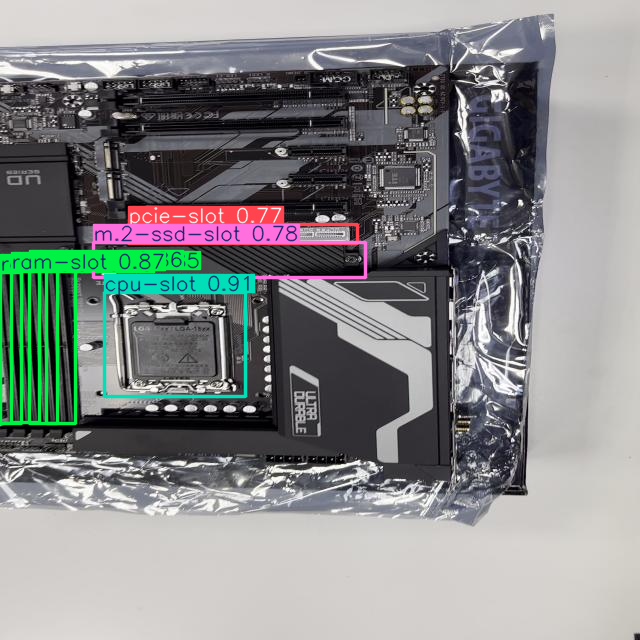

In [9]:
# Cargar el modelo entrenado
# Instancia la clase YOLO y carga los pesos del modelo que fue entrenado previamente.
# La ruta "/content/runs/detect/resultados/weights/best.pt" es la ubicaci√≥n predeterminada
# donde Ultralytics guarda el modelo con el mejor rendimiento (medido por mAP)
# al final del entrenamiento cuyo nombre de ejecuci√≥n fue "yolov8n_unknown_train".
model = YOLO("/content/runs/detect/resultados/weights/best.pt")

# Hacer predicciones sobre una imagen o carpeta
# Utiliza el modelo cargado para realizar inferencias (predicciones de objetos).
# 'source': Define la entrada para la predicci√≥n.
# ¬°IMPORTANTE!: La ruta "/ruta/a/imagenes/de/prueba" es un marcador de posici√≥n y DEBE ser reemplazada
# por la ruta real a la imagen o carpeta de im√°genes que deseas probar.
# Por ejemplo:
# - Para una imagen espec√≠fica: 'source="/content/drive/MyDrive/dataset/test/imagen_desconocida.jpg"'
# - Para una carpeta con varias im√°genes: 'source="/content/drive/MyDrive/dataset/test_images/"'
# 'imgsz': Especifica el tama√±o de la imagen al que se redimensionar√°n las entradas para la inferencia.
# Debe coincidir con el 'imgsz' utilizado durante el entrenamiento (640 en este caso).
# 'conf': Establece el umbral de confianza. Solo las detecciones con una probabilidad superior
# a este valor (0.3 o 30% en este caso) ser√°n consideradas y mostradas. Ajusta este valor
# para controlar la sensibilidad de las detecciones (menor valor = m√°s detecciones, posiblemente m√°s falsos positivos).
results = model.predict(source="/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn/dataset/test/images", imgsz=640, conf=0.3)

# Mostrar visualmente
# Accede al primer objeto de resultados (asumiendo que se procesa una sola imagen o que solo se quiere ver la primera).
# El m√©todo '.show()' visualiza la imagen con las cajas delimitadoras y etiquetas de las detecciones realizadas.
# Esto abrir√° una ventana emergente o mostrar√° la imagen directamente en la salida de Colab.
results[0].show()

Cada l√≠nea representa el resultado de la detecci√≥n de objetos en una imagen espec√≠fica.
- image X/56: Indica que esta es la imagen n√∫mero X de un total de 56 im√°genes que se est√°n procesando.
- /content/drive/MyDrive/CurEspIABD_ProyectoFinal_Iv√°nFalc√≥nMonz√≥n/dataset/test/images/screenshot_384_jpg.rf.08456c533f2caaaf264c86ddde749238.jpg: Esta es la ruta completa de la imagen que ha sido procesada. Puedes ver que las im√°genes provienen de una carpeta de "test" (prueba) dentro de tu Google Drive.
- 640x640: Confirma que la imagen fue redimensionada a 640x640 p√≠xeles antes de ser pasada al modelo para la inferencia, lo cual es consistente con el tama√±o de entrenamiento.
- 1 cpu-slot, 1 m.2-ssd-slot, 1 pcie-slot, 4 ram-slots: Esta es la parte m√°s importante. Enumera los objetos que el modelo ha detectado en la imagen. Por cada detecci√≥n, muestra:

 - La cantidad de objetos detectados de esa clase (por ejemplo, "1 cpu-slot", "4 ram-slots").

 - El nombre de la clase detectada (por ejemplo, cpu-slot, m.2-ssd-slot, pcie-slot, ram-slots).

- 7.5ms (o similar): Este es el tiempo que tard√≥ el modelo en realizar la inferencia (es decir, en procesar esa imagen y generar las detecciones). Los valores est√°n en milisegundos (ms), lo que indica que el modelo es bastante r√°pido en sus predicciones.

- Resumen de la √∫ltima l√≠nea: Speed
  - Speed: 2.3ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

  - Esta l√≠nea final es un resumen de la velocidad promedio del proceso de inferencia para todo el lote de im√°genes (en este caso, las 56 im√°genes de prueba).

- 2.3ms preprocess: Tiempo promedio para el preprocesamiento de cada imagen (como redimensionar y normalizar).
- 8.9ms inference: Tiempo promedio que el modelo tarda en hacer la predicci√≥n real por cada imagen. Esta es la parte central de la detecci√≥n.
- 1.8ms postprocess: Tiempo promedio para el postprocesamiento de las salidas del modelo (aplicar umbrales de confianza, Non-Maximum Suppression para eliminar cajas duplicadas, etc.) para obtener las detecciones finales.
per image at shape (1, 3, 640, 640):
 - Indica que estas velocidades son por imagen, con un formato de entrada de (batch_size=1, canales_rgb=3, altura=640, ancho=640).


**Interpretaci√≥n General**

Estos resultados indican que el modelo est√° funcionando correctamente, identificando y clasificando los diferentes componentes de las placas base. Las velocidades son muy buenas, lo que sugiere que el modelo es eficiente para aplicaciones en tiempo real o con un alto volumen de procesamiento.

In [10]:
# Muestra los nombres de las clases que el modelo ha sido entrenado para detectar.
# El atributo 'names' de un objeto YOLO contiene un diccionario donde las claves son los IDs de las clases
# y los valores son los nombres legibles de esas clases.
# Esto es fundamental para entender qu√© es lo que el modelo puede identificar.
print(model.names)

{0: 'atx_12v', 1: 'atx_power', 2: 'cpu', 3: 'cpu-slot', 4: 'fan-bracket', 5: 'm.2-ssd-slot', 6: 'pcie-slot', 7: 'ram', 8: 'ram-slot', 9: 'ssd', 10: 'unknown'}


Este diccionario es fundamental porque establece la correspondencia entre los IDs num√©ricos (√≠ndices) que el modelo utiliza internamente para sus predicciones, y los nombres legibles de las clases de objetos que ha sido entrenado para detectar.


- Claves (n√∫meros 0 a 10): Son los identificadores √∫nicos que el modelo asigna a cada tipo de objeto. Cuando el modelo detecta algo, devuelve el ID num√©rico de la clase.
- Valores (nombres como 'atx_12v', 'cpu', 'unknown'): Son las etiquetas humanas que corresponden a esos IDs num√©ricos.
Por ejemplo:

Si el modelo detecta un objeto y le asigna el ID 2, que se refiere a un 'cpu'.

Si detecta algo con el ID 10, es de la clase 'unknown', que es como esta configurada en la generaci√≥n de etiquetas. En el archivo data.yaml.

Este mapeo es crucial para la interpretaci√≥n de los resultados de las predicciones del modelo, ya que te permite entender qu√© tipo de objeto ha sido detectado en cada imagen.

## Curvas de p√©rdida del entrenamiento

Este script de Python est√° dise√±ado para visualizar las curvas de p√©rdida del entrenamiento de un modelo YOLOv8 a partir del archivo de resultados generado por Ultralytics.

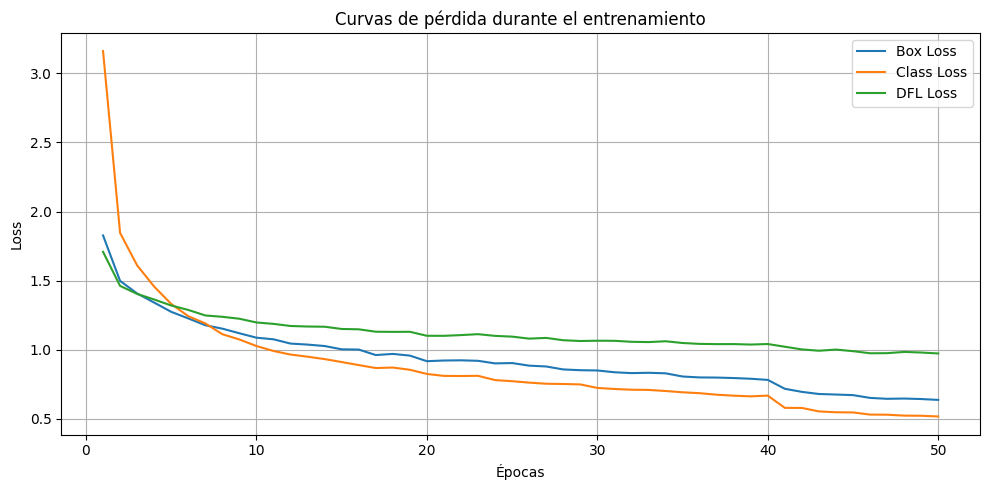

In [12]:
import pandas as pd # Importa la librer√≠a pandas, fundamental para el manejo y an√°lisis de datos tabulares, especialmente √∫til para leer archivos CSV.
import matplotlib.pyplot as plt # Importa el m√≥dulo pyplot de matplotlib, que es la librer√≠a est√°ndar para la creaci√≥n de gr√°ficos y visualizaciones en Python.

# Cargar y limpiar columnas
# Carga el archivo CSV de resultados del entrenamiento en un DataFrame de pandas.
# La ruta '/content/runs/detect/resultados/results.csv' es la ubicaci√≥n por defecto donde Ultralytics guarda
# las m√©tricas de entrenamiento (p√©rdidas, mAP, etc.) para una ejecuci√≥n llamada 'train2'.
df = pd.read_csv('/content/runs/detect/resultados/results.csv')
# Limpia los nombres de las columnas eliminando espacios en blanco al principio y al final.
# Esto asegura que puedas acceder a las columnas por sus nombres sin problemas de coincidencia de espacios.
df.columns = df.columns.str.strip()

# Extraer datos
# Extrae las columnas relevantes del DataFrame para la graficaci√≥n.
# 'epoch': El n√∫mero de √©poca de entrenamiento.
# 'train/box_loss': La p√©rdida de la caja delimitadora durante el entrenamiento. Mide la precisi√≥n de las coordenadas y dimensiones de las cajas predichas.
# 'train/cls_loss': La p√©rdida de clasificaci√≥n durante el entrenamiento. Mide la precisi√≥n con la que el modelo clasifica los objetos dentro de las cajas.
# 'train/dfl_loss': La p√©rdida de DFL (Distribution Focal Loss). Es una p√©rdida espec√≠fica de YOLOv8 que mejora la precisi√≥n de la regresi√≥n de la caja delimitadora.
epochs = df['epoch']
loss_box = df['train/box_loss']
loss_cls = df['train/cls_loss']
loss_dfl = df['train/dfl_loss']

# Graficar
# Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (10 pulgadas de ancho por 5 de alto).
plt.figure(figsize=(10, 5))
# Dibuja la curva de la p√©rdida de la caja delimitadora ('Box Loss') en funci√≥n de las √©pocas.
plt.plot(epochs, loss_box, label='Box Loss')
# Dibuja la curva de la p√©rdida de clasificaci√≥n ('Class Loss').
plt.plot(epochs, loss_cls, label='Class Loss')
# Dibuja la curva de la p√©rdida de DFL ('DFL Loss').
plt.plot(epochs, loss_dfl, label='DFL Loss')
# Establece el t√≠tulo del gr√°fico.
plt.title('Curvas de p√©rdida durante el entrenamiento')
# Establece la etiqueta del eje X (√©pocas).
plt.xlabel('√âpocas')
# Establece la etiqueta del eje Y (valor de la p√©rdida).
plt.ylabel('Loss')
# Muestra una leyenda que identifica cada curva.
plt.legend()
# A√±ade una cuadr√≠cula al gr√°fico para facilitar la lectura de los valores.
plt.grid(True)
# Ajusta autom√°ticamente los par√°metros de la subtrama para que la figura quepa en el √°rea del dibujo.
plt.tight_layout()
# Muestra el gr√°fico en pantalla.
plt.show()

An√°lisis de las Curvas de P√©rdida
El gr√°fico muestra la evoluci√≥n de tres tipos de p√©rdida:

1. Box Loss (Azul): P√©rdida relacionada con la precisi√≥n de las cajas delimitadoras (ubicaci√≥n y tama√±o de los objetos detectados).
2. Class Loss (Naranja): P√©rdida relacionada con la precisi√≥n de la clasificaci√≥n de los objetos dentro de las cajas.
3. DFL Loss (Verde): P√©rdida espec√≠fica de YOLOv8 que mejora la calidad de la regresi√≥n de las cajas.

**Conclusi√≥n sobre el Gr√°fico de P√©rdida:**

El gr√°fico de curvas de p√©rdida muestra un entrenamiento exitoso y estable. La disminuci√≥n constante de las p√©rdidas es que el modelo est√° aprendiendo eficazmente a realizar las tareas de detecci√≥n y clasificaci√≥n. La ca√≠da observada en Class Loss alrededor de la √©poca 40 es un buen signo de optimizaci√≥n.

## M√©tricas de rendimiento mAP (mean Average Precision)



Este fragmento de c√≥digo Python tiene como objetivo visualizar las m√©tricas de rendimiento mAP (mean Average Precision) de un modelo YOLOv8 a lo largo del entrenamiento, utilizando los datos de un archivo CSV de resultados.

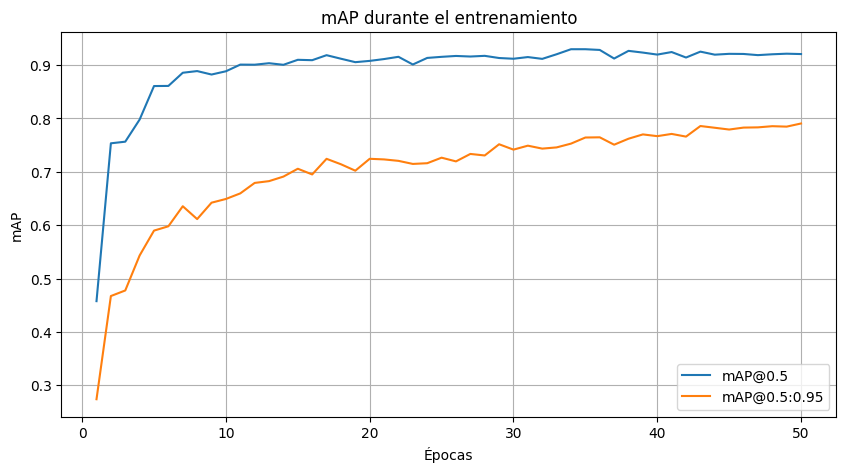

In [13]:
import matplotlib.pyplot as plt # Importa el m√≥dulo pyplot de matplotlib para crear gr√°ficos.
# Se asume que 'epochs' y el DataFrame 'df' ya han sido cargados
# y limpiados en el bloque de c√≥digo anterior, incluyendo la l√≠nea:
# df = pd.read_csv('runs/detect/train2/results.csv')
# df.columns = df.columns.str.strip()
# epochs = df['epoch']

# Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (10 pulgadas de ancho por 5 de alto).
plt.figure(figsize=(10, 5))

# Dibuja la curva de mAP@0.5.
# 'df['metrics/mAP50(B)']' accede a la columna del DataFrame que contiene los valores de mAP con un umbral IoU de 0.5.
# '(B)' en el nombre de la columna a menudo se refiere a las m√©tricas calculadas en el conjunto de "Bounding boxes".
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')

# Dibuja la curva de mAP@0.5:0.95.
# 'df['metrics/mAP50-95(B)']' accede a la columna con los valores de mAP promediados sobre diferentes umbrales IoU.
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

# Establece el t√≠tulo del gr√°fico.
plt.title('mAP durante el entrenamiento')

# Establece la etiqueta del eje X (√©pocas).
plt.xlabel('√âpocas')

# Establece la etiqueta del eje Y (valor de mAP).
plt.ylabel('mAP')

# Muestra una leyenda para identificar las dos curvas de mAP.
plt.legend()

# A√±ade una cuadr√≠cula al gr√°fico para facilitar la lectura de los valores.
plt.grid(True)

# Muestra el gr√°fico en pantalla.
plt.show()

**Conclusi√≥n sobre el Gr√°fico de mAP:**

El gr√°fico de mAP confirma que tu modelo ha entrenado de manera muy efectiva. Las m√©tricas de rendimiento son muy altas y consistentes, lo que indica que el modelo es robusto tanto en la identificaci√≥n de los objetos como en la precisi√≥n de sus cajas delimitadoras.

El entrenamiento hasta 50 √©pocas es positivo, ya que el mAP@0.5:0.95 sigui√≥ mejorando hasta el final.

## Curvas de Precisi√≥n y Recall

Este bloque de c√≥digo sirve para visualizar las curvas de Precisi√≥n y Recall de tu modelo YOLOv8 durante el entrenamiento, utilizando los datos recopilados en el archivo CSV de resultados.

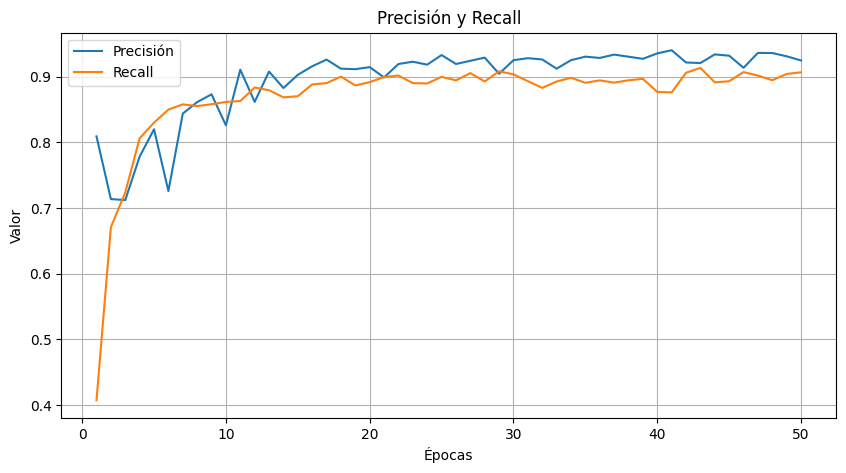

In [14]:
import matplotlib.pyplot as plt # Importa el m√≥dulo pyplot de matplotlib para crear gr√°ficos.
# Asumimos que 'epochs' y el DataFrame 'df' ya fueron cargados y limpiados en bloques de c√≥digo anteriores.

# Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (10 pulgadas de ancho por 5 de alto).
plt.figure(figsize=(10, 5))

# Dibuja la curva de Precisi√≥n.
# 'df['metrics/precision(B)']' accede a la columna del DataFrame que contiene los valores de precisi√≥n.
# El '(B)' indica que las m√©tricas se calcularon sobre las 'Bounding boxes' (cajas delimitadoras).
plt.plot(epochs, df['metrics/precision(B)'], label='Precisi√≥n')

# Dibuja la curva de Recall (Exhaustividad).
# 'df['metrics/recall(B)']' accede a la columna del DataFrame que contiene los valores de recall.
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')

# Establece el t√≠tulo del gr√°fico.
plt.title('Precisi√≥n y Recall')

# Establece la etiqueta del eje X como '√âpocas'.
plt.xlabel('√âpocas')

# Establece la etiqueta del eje Y como 'Valor', ya que ambas m√©tricas son valores entre 0 y 1.
plt.ylabel('Valor')

# Muestra una leyenda para diferenciar las curvas de Precisi√≥n y Recall.
plt.legend()

# A√±ade una cuadr√≠cula al gr√°fico para facilitar la lectura de los valores.
plt.grid(True)

# Muestra el gr√°fico en pantalla.
plt.show()

**An√°lisis de las Curvas de Precisi√≥n y Recall**

El gr√°fico muestra la evoluci√≥n de dos m√©tricas complementarias:

1. Precisi√≥n (Azul): Proporci√≥n de detecciones positivas que fueron correctas. Responde a "¬øDe todas las detecciones que hizo mi modelo, cu√°ntas eran realmente objetos?" (pocos falsos positivos).
2. Recall (Naranja): Proporci√≥n de objetos positivos reales que fueron correctamente identificados. Responde a "¬øCu√°ntos de los objetos que realmente existen detect√≥ mi modelo?" (pocos falsos negativos).

**Conclusi√≥n sobre el Gr√°fico de Precisi√≥n y Recall:**

El modelo ha logrado una precisi√≥n y un recall muy  altos, lo que se traduce en un modelo de detecci√≥n de objetos muy eficaz y fiable. Es capaz de identificar la gran mayor√≠a de los objetos que deber√≠a detectar y, al mismo tiempo, las detecciones que realiza son muy pocas veces err√≥neas.

## 1. Descargar el Modelo Entrenado (best.pt)

Este c√≥digo permite descargar el archivo de pesos del modelo que tuvo el mejor rendimiento durante el entrenamiento (best.pt).

In [16]:
from google.colab import files
import os

# Define la ruta al archivo de pesos del mejor modelo.
# Aseg√∫rate de que esta ruta coincida con el nombre de tu ejecuci√≥n de entrenamiento.
# En tu caso, el nombre de la ejecuci√≥n fue "yolov8n_unknown_train" dentro de "runs/detect".
model_path = "/content/runs/detect/resultados/weights/best.pt"

# Verifica si el archivo existe antes de intentar descargarlo
if os.path.exists(model_path):
    print(f"Descargando el modelo: {model_path}")
    # Usa la funci√≥n 'files.download' de Google Colab para iniciar la descarga.
    files.download(model_path)
    print("¬°Descarga completada!")
else:
    print(f"Error: El archivo del modelo no se encontr√≥ en {model_path}")
    print("Aseg√∫rate de que la ruta sea correcta y que el entrenamiento haya finalizado.")

Descargando el modelo: /content/runs/detect/resultados/weights/best.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¬°Descarga completada!


## 2. Guardar la Carpeta runs en Google Drive

La carpeta runs contiene no solo los pesos del modelo, sino tambi√©n los gr√°ficos de entrenamiento (p√©rdidas, mAP, etc.), los registros, y otros archivos importantes generados durante el proceso.

In [17]:
import shutil
import os

# Define la ruta de la carpeta 'runs' que quieres guardar.
# Esta carpeta contiene todos los resultados de tus entrenamientos YOLOv8.
source_runs_dir = "/content/runs"

# Define la ruta de destino en tu Google Drive.
# Recomiendo crear una subcarpeta para organizar tus experimentos.
# Por ejemplo, puedes querer guardarlos en una carpeta llamada 'yolov8_experiments' en tu Drive.
destination_drive_dir = "/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn"

# Aseg√∫rate de que el directorio de destino en Drive exista
os.makedirs(destination_drive_dir, exist_ok=True)

print(f"Copiando la carpeta '{source_runs_dir}' a '{destination_drive_dir}'...")

try:
    # Copia el contenido de la carpeta 'runs' al destino en Google Drive.
    # 'shutil.copytree' copia un directorio completo, incluyendo su contenido.
    # 'dirs_exist_ok=True' permite sobrescribir directorios si ya existen (√∫til para actualizar resultados).
    shutil.copytree(source_runs_dir, destination_drive_dir, dirs_exist_ok=True)
    print("¬°Copia de la carpeta 'runs' a Google Drive completada!")
except Exception as e:
    print(f"Error al copiar la carpeta: {e}")
    print("Verifica que Google Drive est√© montado y que las rutas sean correctas.")

Copiando la carpeta '/content/runs' a '/content/drive/MyDrive/CurEspIABD_ProyectoFinal_IvaÃÅnFalcoÃÅnMonzoÃÅn'...
¬°Copia de la carpeta 'runs' a Google Drive completada!


## Otros Resultados Obtenidos

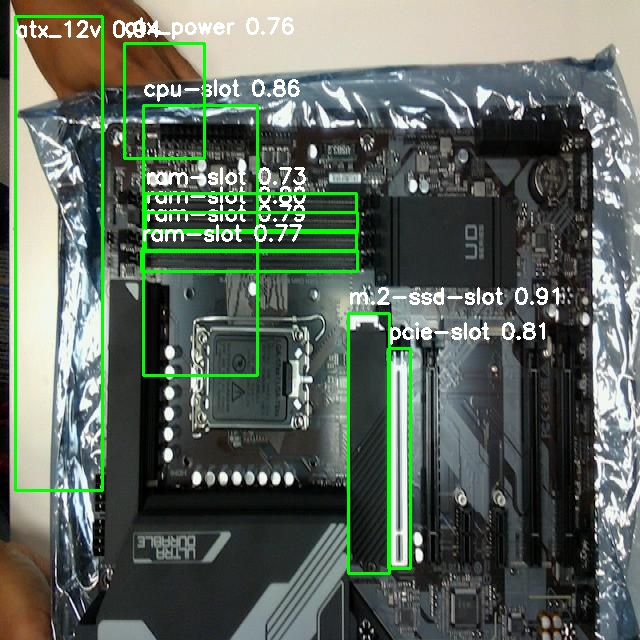

## Repositorios

- Dataset inicial: https://universe.roboflow.com/gradresearch/gradresearch

- Google Colab: https://colab.research.google.com/drive/11X6-vMe4TnmLKkDWmBzcQz4uRGPijMRp?usp=sharing

- Google Drive: https://drive.google.com/drive/folders/1Xzf3wejBUWDtcBH4_ekeg6cCaAUSaqsC?usp=sharing

- Github: https://github.com/IvanFalconMonzon/CurEspIABD_ProyectoFinal_IvanFalconMonzon.git

- Presentaci√≥n: https://www.canva.com/design/DAGoFF8b7GU/6S5vJ4ckhicu-QaonLDRpg/edit?utm_content=DAGoFF8b7GU&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton